In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from trajectories import TrajectoriesDataset, preprocess_dataset, find_activations
from torch.utils.data import DataLoader
import os

%load_ext autoreload
%autoreload 2


In [2]:
data_path = 'agents/MiniGrid-Triggers-3x3-T1P1-v0/random/trajectories/train_10000_padded.pt'

dataset = torch.load(data_path)

print('obs size:', dataset.observations.shape)
print('act size:', dataset.actions.shape)
print('reward size:', dataset.rewards.shape)

obs size: torch.Size([10000, 50, 24, 24, 3])
act size: torch.Size([10000, 50, 3])
reward size: torch.Size([10000, 50])


0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0], device='cuda:0')


returns tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       device='cuda:0')
preds tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0], device='cuda:0')


returns tensor([ 0,  0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       device='cuda:0')
preds tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0], device='cuda:0')


r

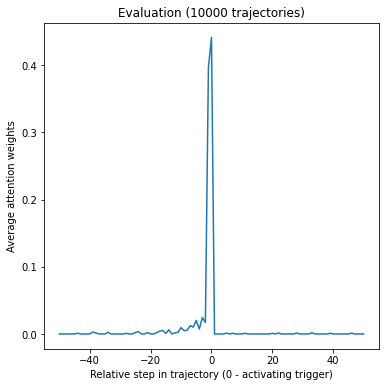

In [5]:
from train_reward_predictors import run_ca_evaluation
from config import ATTN_THRESHOLD

batch_size = 128
best_model_path = 'wandb/run-20210419_152906-7v8ji1ez/files/best_model.pt'
# test_path = 'agents/MiniGrid-Triggers-3x3-T1P1-v0/random/trajectories/test_5000_padded.pt'
test_path = 'agents/MiniGrid-Triggers-3x3-T1P1-v0/random/trajectories/train_10000_padded.pt'
obs_mean_path = 'agents/MiniGrid-Triggers-3x3-T1P1-v0/random/trajectories/train_10000_padded_mean.pt'
obs_std_path = 'agents/MiniGrid-Triggers-3x3-T1P1-v0/random/trajectories/train_10000_padded_std.pt'

use_returns = True
skip_no_trigger_episodes_precision = True


acc, ca_precision, ca_recall, axes, ca_gt, rel_attn_vals = run_ca_evaluation(best_model_path, test_path, obs_mean_path, obs_std_path, None, ATTN_THRESHOLD, batch_size, skip_no_trigger_episodes_precision, use_returns=use_returns, use_wandb=False)

print('acc:', acc)
print('ca_precision:', ca_precision)
print('ca_recall:', ca_recall)
# print('acc:', acc)

plt.show()

In [4]:
# from config import PAD_VAL

# dataset.rewards += 1

# padding_mask = (dataset.actions[:, :, 0] == PAD_VAL) # padded positions are True

# ep = 7
# print(f'padding mask for episode {ep}')
# print(padding_mask[ep])
print(f'rewards for episode {ep}')
# print(dataset.rewards[ep])

In [5]:
# dataset.rewards[padding_mask] = PAD_VAL # set padded steps to PAD_VAL

In [6]:
# print(f'rewards for episode {ep}')
# print(dataset.rewards[ep])

In [7]:
# torch.save(dataset, 'agents/MiniGrid-Triggers-3x3-T1P1-v0/random/trajectories/train_10000_padded.pt')

In [10]:
ca_gt

{'attention_threshold': 0.2,
 'batch_size': 128,
 'episodes_with_trigger_mask': tensor([0, 1, 0,  ..., 0, 0, 0], device='cuda:0'),
 'episodes_with_prize_mask': tensor([0, 0, 0,  ..., 0, 0, 1], device='cuda:0'),
 'seq_len': 50,
 'trigger_activations': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0', dtype=torch.uint8),
 'trigger_timesteps': tensor([ 0, 24,  0,  ...,  0,  0,  0], device='cuda:0'),
 'prize_activations': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8),
 'prize_timesteps': tensor([0, 0, 0,  ..., 0, 0, 3])}

Touched trigger at step: 23
Got prize at step: 25


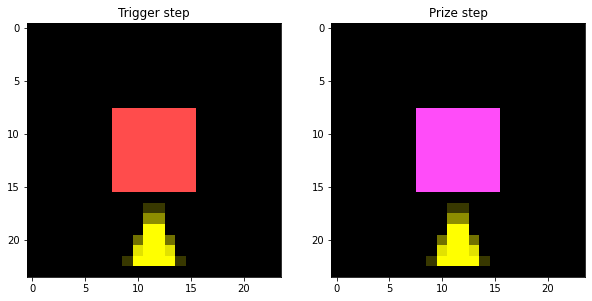

In [82]:
episode = 6

touched_trigger = bool(ca_gt['episodes_with_trigger_mask'][episode])
touched_prize = bool(ca_gt['episodes_with_prize_mask'][episode])

trigger_step = ca_gt['trigger_timesteps'][episode].item()
prize_step = ca_gt['prize_timesteps'][episode].item()

print('Touched trigger at step:', trigger_step if touched_trigger else 'never')
print('Got prize at step:', prize_step if touched_prize else 'never')

fig, axes = plt.subplots(1,2, figsize=(10,5))


axes[0].set_title('Trigger step')

if touched_trigger:
    axes[0].imshow(dataset.observations[episode,trigger_step].type(torch.int32))
else:
    axes[0].imshow(np.zeros_like(dataset.observations[episode,trigger_step]))

axes[1].set_title('Prize step')
if touched_prize:
    axes[1].imshow(dataset.observations[episode,prize_step].type(torch.int32))
else:
    axes[0].imshow(np.zeros_like(dataset.observations[episode,trigger_step]))

plt.show()

In [111]:
(ca_gt['episodes_with_prize_mask'] != 0).nonzero().squeeze()[:50]

tensor([  3,   4,   6,   7,  10,  11,  15,  16,  17,  19,  20,  27,  28,  29,
         30,  32,  33,  35,  36,  40,  42,  44,  45,  48,  51,  53,  54,  55,
         57,  58,  61,  62,  66,  67,  75,  76,  77,  79,  80,  82,  91,  92,
         99, 100, 103, 105, 112, 122, 123, 125], device='cuda:0')

In [114]:
dataset.rewards[19]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

In [119]:
dataset.rewards.shape

torch.Size([5000, 50])

In [120]:
dataset.rewards[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])

In [142]:
torch.unique(dataset.rewards[:7,:], dim=1, sorted=True)[:5,:]

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 1]])

In [144]:
unique_rewards_per_episode[:10]

[tensor([1]),
 tensor([1]),
 tensor([1]),
 tensor([0, 1]),
 tensor([0, 1]),
 tensor([1]),
 tensor([0, 1, 2]),
 tensor([0, 1]),
 tensor([1]),
 tensor([1])]

tensor([ 1732,   495,  9626,  8584,  2524, 10144,   887, 18741,  4767, 17327])

Positive: 1561 | Negative: 1425


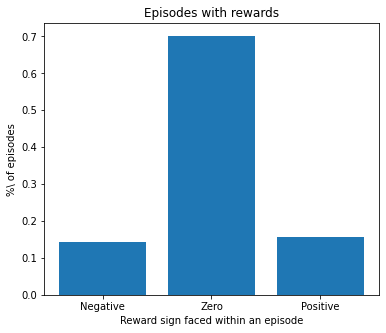

In [16]:
from config import PAD_VAL
from trajectories import TrajectoriesDataset

device = torch.device('cuda')

seed = 128

data_path = 'agents/MiniGrid-Triggers-3x3-T1P1-v0/mixed/trajectories/train_10000.pt'
dataset = torch.load(data_path)

# data_path_15 = 'agents/MiniGrid-Triggers-3x3-T1P1-v0/ep15000/trajectories/test.pt'
# dataset_15 = torch.load(data_path_15)

# combined_obs = torch.vstack((dataset_random.observations, dataset_15.observations))
# combined_act = torch.vstack((dataset_random.actions, dataset_15.actions))
# combined_rew = torch.vstack((dataset_random.rewards, dataset_15.rewards))

# # combined 10K dataset
# train_size = 10_000
# test_size = 5_000

# perm = torch.randperm(combined_rew.shape[0])
# indices = train_perm[:test_size]

# final_obs = combined_obs[indices]
# final_act = combined_act[indices]
# final_rew = combined_rew[indices]

# mixed_dataset = TrajectoriesDataset(final_obs, final_act, final_rew)

# ep = 5
# print('actions:', mixed_dataset.actions[ep])
# print('-- BEFORE --')
# print('rewards:', mixed_dataset.rewards[ep])

# # convert rewards to classes
# mixed_dataset.rewards += 1

# # pad rewards
# padding_mask = (mixed_dataset.actions[:, :, 0] == PAD_VAL)
# mixed_dataset.rewards[padding_mask] = PAD_VAL 

# print('-- AFTER --')
# print('rewards:', mixed_dataset.rewards[ep])
# # print(f'padding mask for episode {ep}')
# # print(padding_mask[ep])

# torch.save(mixed_dataset, 'agents/MiniGrid-Triggers-3x3-T1P1-v0/mixed/trajectories/test_5000.pt')

# plot reward distribution
padding_mask = (dataset.actions[:, :, 0] == PAD_VAL)

unique_rewards_per_episode = [torch.unique(dataset.rewards[episode]).tolist() for episode in range(dataset.rewards.shape[0])]

n_episodes_positive_reward = 0
n_episodes_negative_reward = 0
for episode_reward_vals in unique_rewards_per_episode:
    if 2 in episode_reward_vals:
        n_episodes_positive_reward += 1
    if 0 in episode_reward_vals:
        n_episodes_negative_reward += 1

n_episodes_no_reward = dataset.rewards.shape[0] - n_episodes_positive_reward - n_episodes_negative_reward
reward_vals = torch.tensor([n_episodes_negative_reward, n_episodes_no_reward, n_episodes_positive_reward])

print(f'Positive: {n_episodes_positive_reward} | Negative: {n_episodes_negative_reward}')

plt.figure(figsize=(6,5))
plt.title('Episodes with rewards')
plt.xlabel('Reward sign faced within an episode')
plt.ylabel('%\ of episodes')
plt.bar(torch.arange(0, 3)-1, reward_vals/torch.sum(reward_vals), tick_label=['Negative', 'Zero', 'Positive'])
plt.show()


In [41]:


def describe_dataset(dataset):
    print('observations', dataset.observations.shape)
    print('\n')
    print('actions', dataset.actions.shape)
    print('unique actions', torch.unique(dataset.actions))
    print('\n')
    print('rewards', dataset.rewards.shape)
    print('unique rewards:', torch.unique(dataset.rewards))

# describe_dataset(mixed_dataset)

# from config import PAD_VAL

# print('Converting rewards to reward classes...')
# mixed_dataset.rewards += 1

padding_mask = (mixed_dataset.actions[:, :, 0] == PAD_VAL) # padded positions are True

ep = 5
print(f'padding mask for episode {ep}')
print(padding_mask[ep])
# print(f'rewards for episode {ep}')
# print(mixed_dataset.rewards[ep])

# print('Padding...')
# mixed_dataset.rewards[padding_mask] = PAD_VAL # set padded steps to PAD_VAL
print(f'rewards for episode {ep}')
print(mixed_dataset.rewards[ep])

# torch.save(dataset, 'agents/MiniGrid-Triggers-3x3-T1P1-v0/random/trajectories/train_10000_padded.pt')

padding mask for episode 5
tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])
rewards for episode 5
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])


Converting rewards to reward classes...
padding mask for episode 7
tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])
rewards for episode 7
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
Padding...
rewards for episode 7
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])


In [16]:
padding_mask = (dataset.actions[:, :, 0] == PAD_VAL)
dataset.rewards[~padding_mask].shape

torch.Size([400570])

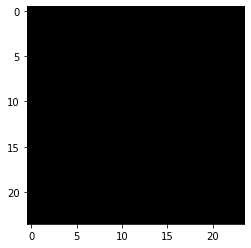

In [71]:
plt.imshow(dataset.observations[7,3])
plt.show()

In [9]:
from train_reward_predictors import run_ca_evaluation
from config import PAD_VAL, ATTN_THRESHOLD

BATCH_SIZE = 128

model_path = 'agents/MiniGrid-Triggers-3x3-T1P1-v0/ca-evaluation-3x3/model_s44_r1.000_p1.000_a0.879_l0.065.pt'
test_data_path = 'agents/MiniGrid-Triggers-3x3-T1P1-v0/random/trajectories/test.pt'

acc, ca_precision, ca_recall, axes = run_ca_evaluation(model_path, test_data_path, obs_mean_path, obs_std_path, None, ATTN_THRESHOLD, BATCH_SIZE, use_wandb=False)

print(f'Acc: {acc} | Pr: {ca_precision} | Rec: {ca_recall}')

plt.show()


    

/home/mbaliesnyi/anaconda3/envs/rl/lib/python3.8/site-packages/torch/tensor.py:758: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:930.)
  return super(Tensor, self).refine_names(names)


RuntimeError: mat1 dim 1 must match mat2 dim 0

Total reward: 1, tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])


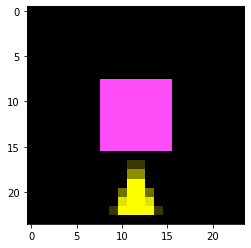

In [30]:
from reward_predictor import RewardPredictor

ACTION_SPACE_SIZE = dataset.actions.shape[-1]
OBSERVATION_SPACE_DIMS = [dataset.observations.shape[-1], *dataset.observations.shape[2:-1]]

# model = RewardPredictor(OBSERVATION_SPACE_DIMS, ACTION_SPACE_SIZE, device, verbose=False).to(device)

for i, batch in enumerate(train_loader):
    observations, actions, rewards, indices = batch

    rewards[episode] -= 1

    episode = 1
    step = 27
    print(f'Total reward: {torch.sum(rewards[episode])},', rewards[episode])

    plt.imshow(observations[episode,step].type(torch.int32))
    plt.show()
    break
    # print(torch.unique(returns))

    # observations = observations.transpose(2, 4).transpose(0, 1).to(device)
    # actions = actions.transpose(0, 1).to(device)
    # returns = returns.transpose(0, 1).to(device)

    # output = model(observations, actions)

    # print(output.shape)

unique: tensor([1, 2])
red tensor([255,  76,  76], dtype=torch.uint8)
pink tensor([255,  76, 249], dtype=torch.uint8)


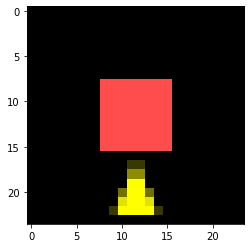

In [51]:
# debug
loader = DataLoader(dataset_new, batch_size=128)
episode = 3

for i, batch in enumerate(loader):
    observations, actions, reward, indices = batch

    # observations = observations.type(torch.FloatTensor)
    # observations[observations == 10] = 0

    # mean = torch.mean(observations, axis=(0,1,2,3))
    # std = torch.std(observations, axis=(0,1,2,3))
    # observations = (observations - mean) / std

    returns = torch.ones_like(reward) * 0
    sums = torch.sum(reward, axis=1)

    returns += sums[:, None]
    returns += 1
    print('unique:', torch.unique(returns))
    renormalized = (observations * std + mean).type(torch.ByteTensor)
    plt.imshow(renormalized[episode, 3, :, :, :])
    print('red',renormalized[episode, 3, 12, 12, :])
    print('pink',renormalized[episode, 7, 12, 12, :])
    plt.show()
    break